<a href="https://colab.research.google.com/github/ravishanilneth/Early-Detection-of-Alzheimer-s-Disease-Using-Explainable-AI-Powered-Deep-Learning/blob/main/Tabular_preprocessing_and_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Preprocessing

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report
import xgboost as xgb
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [ ]:
# Load the dataset
data = pd.read_csv('/content/oasis_cross-sectional.csv')

In [ ]:
# Data types and missing values
print("\nData types and missing values:")
print(data.info())


Data types and missing values:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 436 entries, 0 to 435
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ID      436 non-null    object 
 1   M/F     436 non-null    object 
 2   Hand    436 non-null    object 
 3   Age     436 non-null    int64  
 4   Educ    235 non-null    float64
 5   SES     216 non-null    float64
 6   MMSE    235 non-null    float64
 7   CDR     235 non-null    float64
 8   eTIV    436 non-null    int64  
 9   nWBV    436 non-null    float64
 10  ASF     436 non-null    float64
 11  Delay   20 non-null     float64
 12  Group   416 non-null    object 
dtypes: float64(7), int64(2), object(4)
memory usage: 44.4+ KB
None


In [ ]:
# Drop rows where 'CDR' is NaN
data.dropna(subset=['CDR'], inplace=True)

In [ ]:
# Drop unnecessary columns
data.drop(['ID', 'Hand', 'Delay', 'CDR'], axis=1, inplace=True)

In [ ]:
# Drop rows where 'Group' is NaN
data.dropna(subset=['Group'], inplace=True)

# Fill missing values of MMSE with the median
data['MMSE'].fillna(data['MMSE'].mode()[0], inplace=True)

# Fill missing values of Educ with the mode
data['Educ'].fillna(data['Educ'].mode()[0], inplace=True)

# Fill missing values of SES with the mode
data['SES'].fillna(data['SES'].mode()[0], inplace=True)

<ipython-input-7-8917b11dca0d>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['MMSE'].fillna(data['MMSE'].mode()[0], inplace=True)
<ipython-input-7-8917b11dca0d>:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', t

In [ ]:
# Identify continuous columns that are actually categorical
categorical_columns = ['Educ', 'SES', 'M/F', 'Group']

# Convert these columns to 'category' data type
for column in categorical_columns:
    data[column] = data[column].astype('category')

# Update the list of categorical columns
categorical_columns = data.select_dtypes(include=['category', 'object']).columns

In [ ]:
# Data types and missing values
print("\nData types and missing values:")
print(data.info())


Data types and missing values:
<class 'pandas.core.frame.DataFrame'>
Index: 235 entries, 0 to 415
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype   
---  ------  --------------  -----   
 0   M/F     235 non-null    category
 1   Age     235 non-null    int64   
 2   Educ    235 non-null    category
 3   SES     235 non-null    category
 4   MMSE    235 non-null    float64 
 5   eTIV    235 non-null    int64   
 6   nWBV    235 non-null    float64 
 7   ASF     235 non-null    float64 
 8   Group   235 non-null    category
dtypes: category(4), float64(3), int64(2)
memory usage: 12.7 KB
None


In [ ]:
# Define target variable
y = data['Group']

In [ ]:
# Encode the target variable
label_encoder = LabelEncoder()
# Fit the encoder on the unique values in your target column, handling NaNs
label_encoder.fit(y.unique())
y_encoded = label_encoder.transform(y)

In [ ]:
from sklearn.preprocessing import LabelEncoder, MinMaxScaler

# Define columns
categorical_columns = ['Educ', 'SES', 'M/F', 'Group']
continuous_columns = ['MMSE', 'nWBV', 'ASF', 'eTIV', 'Age']

# Dictionary to store LabelEncoders for each categorical column
label_encoders = {}

# Label Encoding for each categorical column separately
for col in categorical_columns:
    label_encoder = LabelEncoder()
    data[col] = label_encoder.fit_transform(data[col].astype(str))
    label_encoders[col] = label_encoder  # Save the encoder for later use

# Normalization for continuous columns
#scaler = MinMaxScaler()
#data[continuous_columns] = scaler.fit_transform(data[continuous_columns])

# To get the labels of the encoded values for each categorical column
for col in categorical_columns:
    print(f"Labels for '{col}': {list(label_encoders[col].classes_)}")

Labels for 'Educ': ['1.0', '2.0', '3.0', '4.0', '5.0']
Labels for 'SES': ['1.0', '2.0', '3.0', '4.0', '5.0']
Labels for 'M/F': ['F', 'M']
Labels for 'Group': ['Mild Dementia', 'Moderate Dementia', 'Non Demented', 'Very Mild Dementia']


In [ ]:
# Save the preprocessed data
data.to_csv('preprocessed_tab_data_1.csv', index=False)

In [ ]:
# Display the mapping of original categories to their encoded values for each categorical column
for col in categorical_columns:
    label_encoder = label_encoders[col]
    print(f"Category mapping for '{col}':")
    for index, category in enumerate(label_encoder.classes_):
        print(f"  {index} -> {category}")
    print()  # Print a blank line for better readability

Category mapping for 'Educ':
  0 -> 1.0
  1 -> 2.0
  2 -> 3.0
  3 -> 4.0
  4 -> 5.0

Category mapping for 'SES':
  0 -> 1.0
  1 -> 2.0
  2 -> 3.0
  3 -> 4.0
  4 -> 5.0

Category mapping for 'M/F':
  0 -> F
  1 -> M

Category mapping for 'Group':
  0 -> Mild Dementia
  1 -> Moderate Dementia
  2 -> Non Demented
  3 -> Very Mild Dementia



# EDA

In [ ]:
# Descriptive statistics for continuous columns
print("Descriptive Statistics for Continuous Columns:")
print(data[continuous_columns].describe())

# Descriptive statistics for categorical variables
print("\nDescriptive Statistics for Categorical Columns:")
print(data[categorical_columns].describe())

Descriptive Statistics for Continuous Columns:
            MMSE        nWBV         ASF         eTIV         Age
count  235.00000  235.000000  235.000000   235.000000  235.000000
mean    27.06383    0.749132    1.216511  1459.497872   72.344681
std      3.69687    0.047906    0.129427   160.368070   12.091369
min     14.00000    0.644000    0.881000  1123.000000   33.000000
25%     26.00000    0.713500    1.133500  1348.000000   66.000000
50%     29.00000    0.747000    1.213000  1447.000000   73.000000
75%     30.00000    0.784000    1.302000  1548.000000   81.000000
max     30.00000    0.847000    1.563000  1992.000000   96.000000

Descriptive Statistics for Categorical Columns:
             Educ         SES         M/F       Group
count  235.000000  235.000000  235.000000  235.000000
mean     2.178723    1.451064    0.336170    2.051064
std      1.311510    1.082470    0.473406    0.885272
min      0.000000    0.000000    0.000000    0.000000
25%      1.000000    1.000000    0.00000

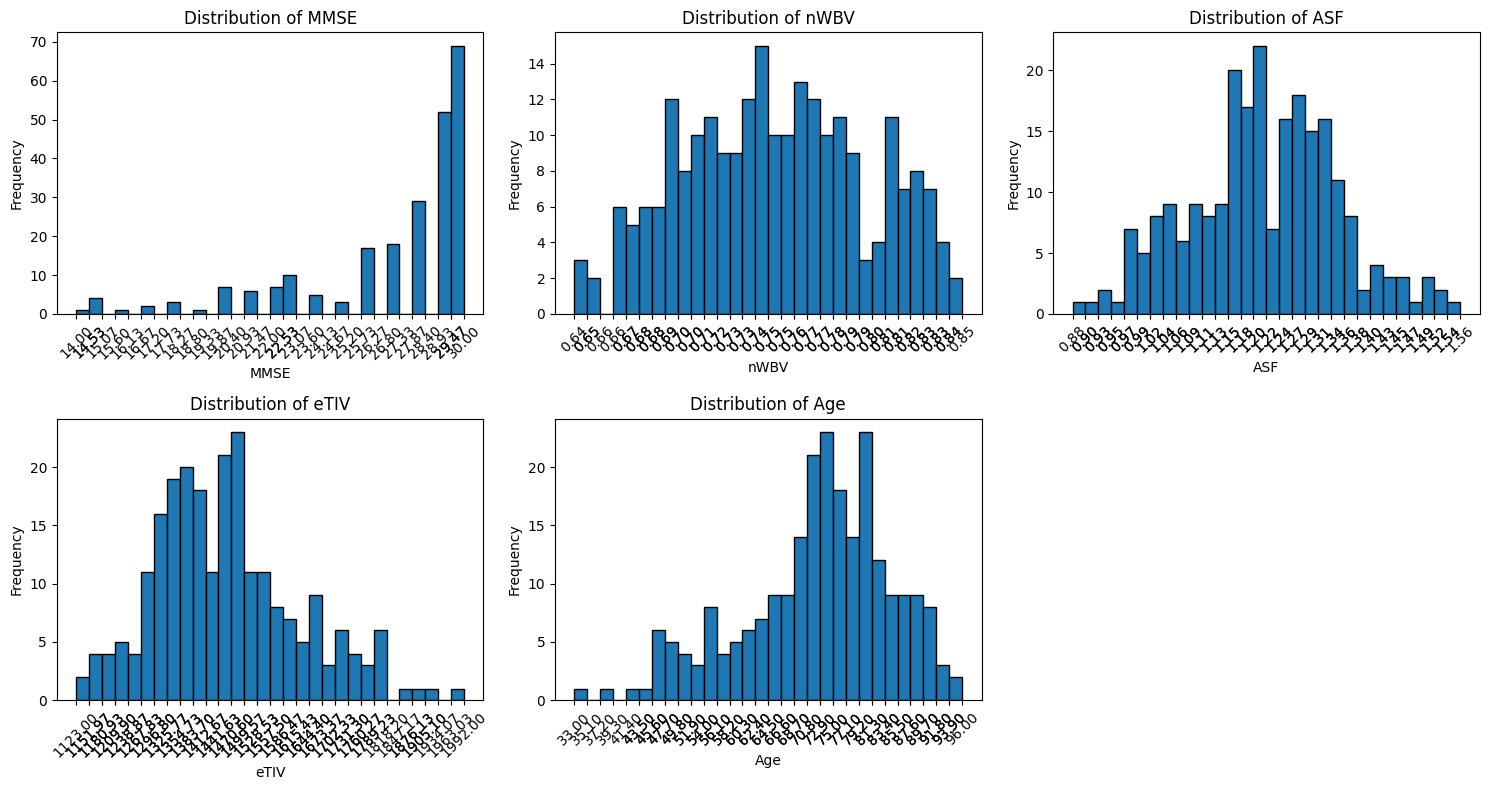

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Set the number of rows and columns for the grid
rows = 2
cols = 3

# Create a figure with subplots arranged in a grid
fig, axes = plt.subplots(rows, cols, figsize=(15, 8))  # Adjust figsize as needed

# Loop through each continuous column and plot separate histograms on the subplots
for i, column in enumerate(continuous_columns):
    # Determine the position of the subplot
    row = i // cols
    col = i % cols

    # Create the histogram and get counts and bin edges
    n, bins, patches = axes[row, col].hist(data[column], bins=30, edgecolor='black')

    # Filter bin edges where the count is non-zero
    bins_with_counts = bins[:-1][n > 0]
    bins_with_counts_right = bins[1:][n > 0]

    # Create labels for both the left and right edges of bins with counts
    bin_edges_labels = [f'{edge:.2f}' for edge in bins_with_counts]
    bin_edges_labels_right = [f'{edge:.2f}' for edge in bins_with_counts_right]

    # Combine left and right edges
    combined_bins = np.concatenate((bins_with_counts, bins_with_counts_right))
    combined_labels = np.concatenate((bin_edges_labels, bin_edges_labels_right))

    # Set x-ticks at edges of bins with counts
    axes[row, col].set_xticks(combined_bins)
    axes[row, col].set_xticklabels(combined_labels, rotation=45)

    axes[row, col].set_title(f'Distribution of {column}')
    axes[row, col].set_xlabel(column)
    axes[row, col].set_ylabel('Frequency')

# Remove any empty subplots
for j in range(len(continuous_columns), rows * cols):
    fig.delaxes(axes.flatten()[j])

plt.tight_layout()  # Adjust layout to prevent overlapping
plt.show()

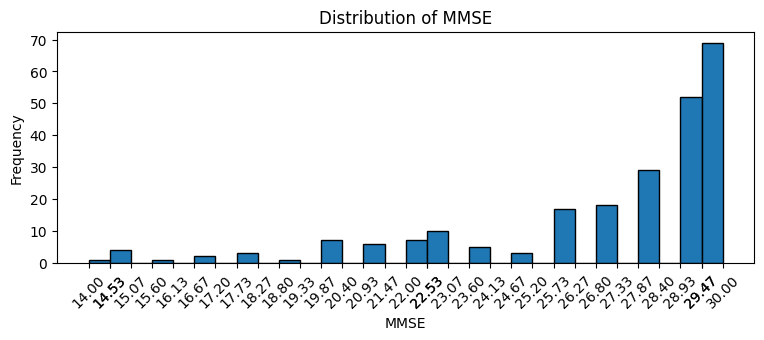

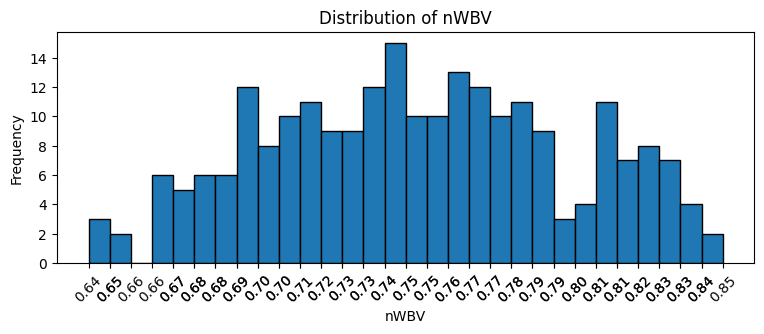

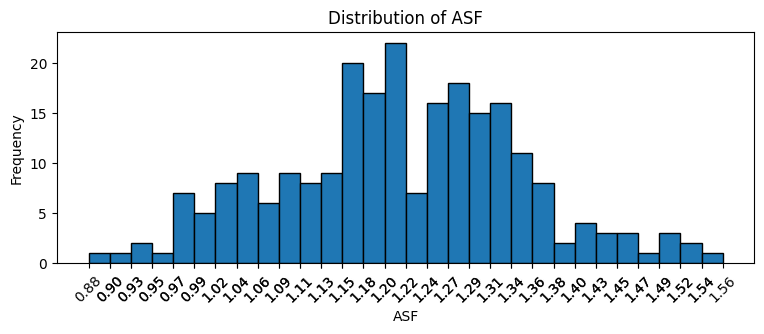

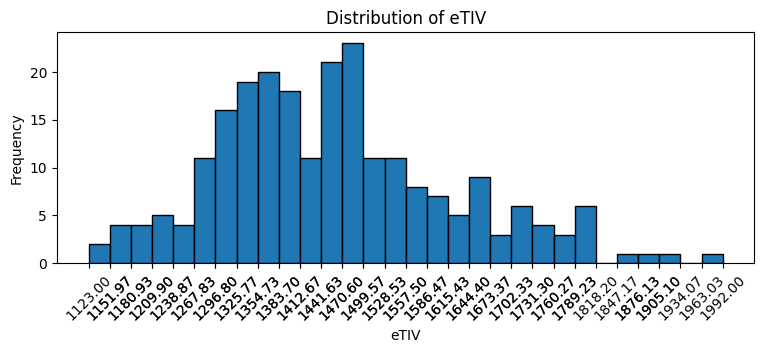

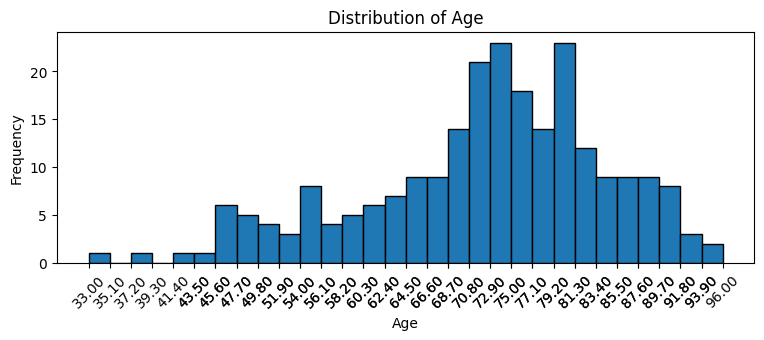

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Loop through each continuous column and plot separate histograms
for column in continuous_columns:  # Use continuous_columns defined earlier
    plt.figure(figsize=(9, 3))  # Set the figure size for each plot

    # Create the histogram and get counts and bin edges
    n, bins, patches = plt.hist(data[column], bins=30, edgecolor='black')

    # Filter bin edges where the count is non-zero
    bins_with_counts = bins[:-1][n > 0]
    bins_with_counts_right = bins[1:][n > 0]

    # Create labels for both the left and right edges of bins with counts
    bin_edges_labels = [f'{edge:.2f}' for edge in bins_with_counts]
    bin_edges_labels_right = [f'{edge:.2f}' for edge in bins_with_counts_right]

    # Combine left and right edges
    combined_bins = np.concatenate((bins_with_counts, bins_with_counts_right))
    combined_labels = np.concatenate((bin_edges_labels, bin_edges_labels_right))

    # Set x-ticks at edges of bins with counts
    plt.xticks(combined_bins, labels=combined_labels, rotation=45)

    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')

    plt.show()  # Display the plot

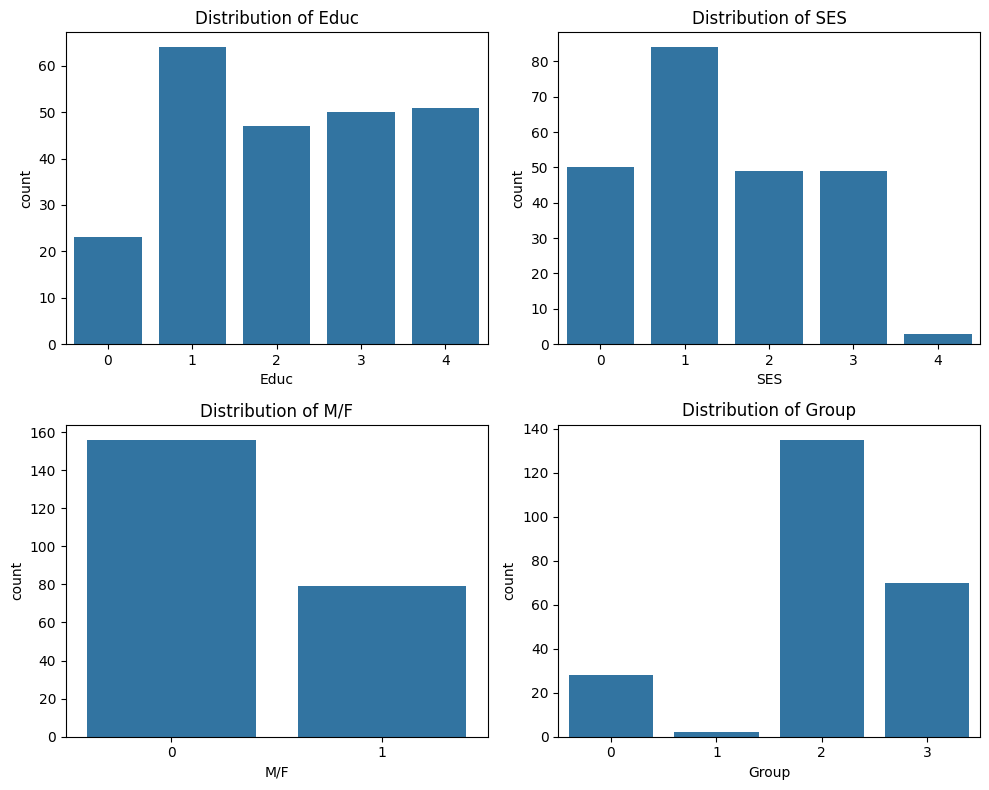

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the number of rows and columns for the grid
rows = 2
cols = 2

# Create a figure with subplots arranged in a grid
fig, axes = plt.subplots(rows, cols, figsize=(10, 8))  # Adjust the figure size as needed

# Loop through each categorical column and plot on the subplots
for i, column in enumerate(categorical_columns):
    # Determine the position of the subplot
    row = i // cols
    col = i % cols

    # Create the count plot on the appropriate subplot axis
    sns.countplot(x=column, data=data, ax=axes[row, col])
    axes[row, col].set_title(f"Distribution of {column}")

# Remove any empty subplots if there are fewer than rows*cols categorical columns
for j in range(len(categorical_columns), rows * cols):
    fig.delaxes(axes.flatten()[j])

plt.tight_layout()  # Adjust the layout to prevent overlap
plt.show()

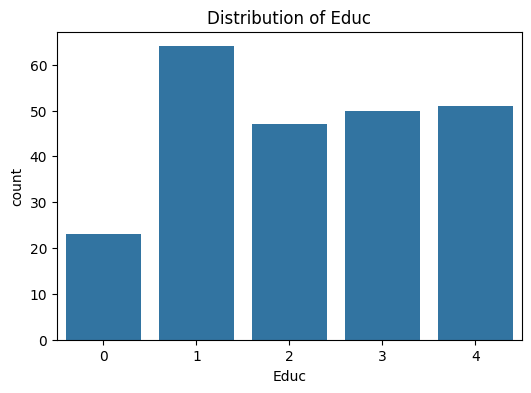

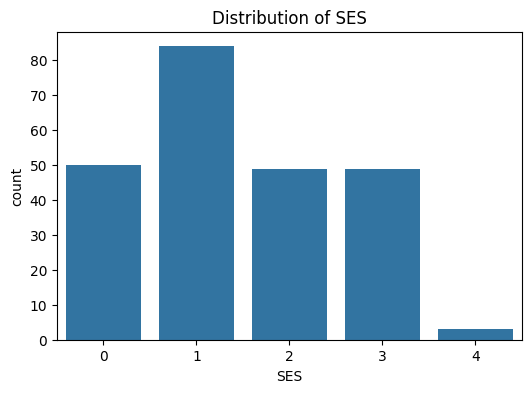

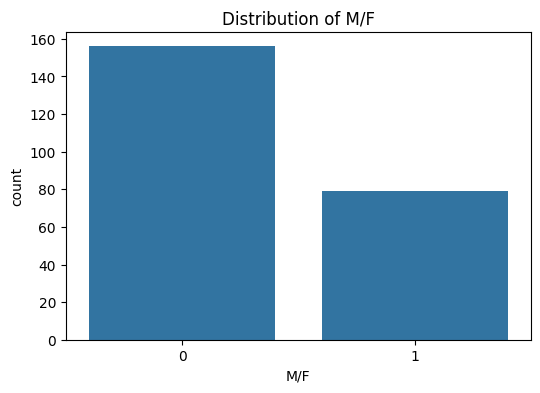

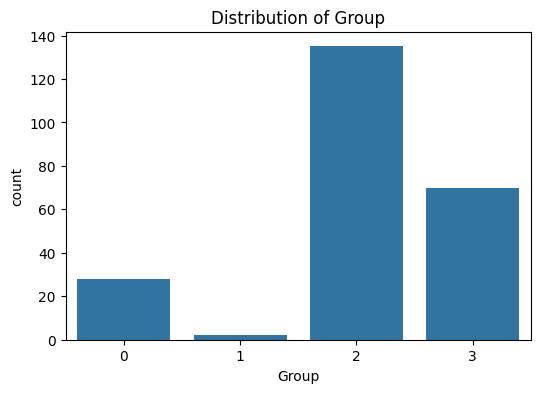

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Visualize distribution of categorical variables directly
for column in categorical_columns:
    plt.figure(figsize=(6, 4))
    sns.countplot(x=column, data=data)
    plt.title(f"Distribution of {column}")
    plt.show()

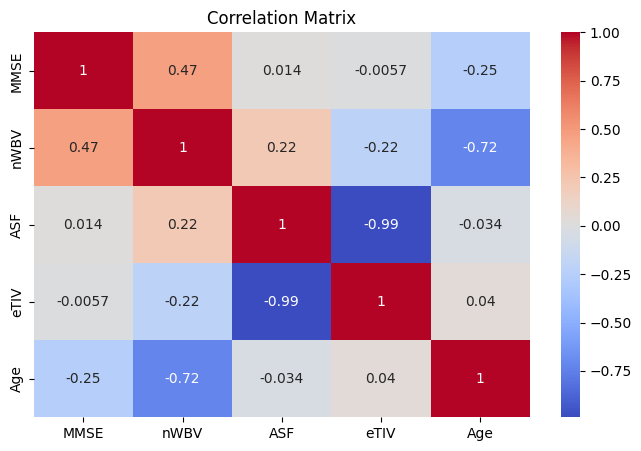

In [ ]:
# Correlation analysis for continuous variables
# Select only numeric columns for correlation matrix
correlation_matrix = data[continuous_columns].corr()

plt.figure(figsize=(8, 5))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

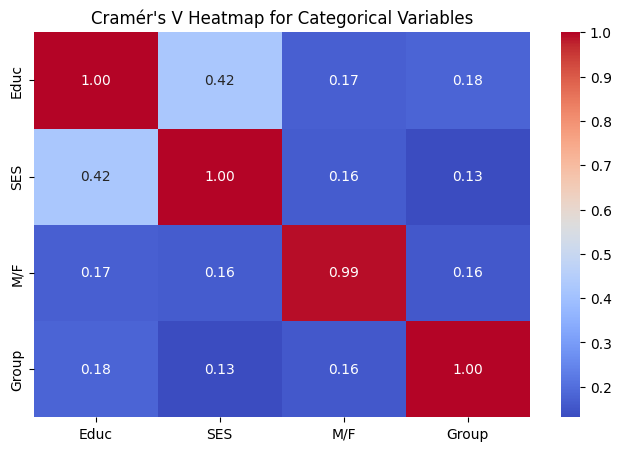

In [ ]:
import pandas as pd
import numpy as np
from scipy.stats import chi2_contingency

# Function to calculate Cramér's V
def cramers_v(x, y):
    contingency_table = pd.crosstab(x, y)
    chi2 = chi2_contingency(contingency_table)[0]
    n = contingency_table.sum().sum()
    r, k = contingency_table.shape
    return np.sqrt(chi2 / (n * (min(r, k) - 1)))

# Create a matrix for Cramér's V for categorical variables
categorical_columns = ['Educ', 'SES', 'M/F', 'Group']  # Your categorical columns

cramers_v_matrix = pd.DataFrame(np.zeros((len(categorical_columns), len(categorical_columns))),
                                index=categorical_columns, columns=categorical_columns)

for col1 in categorical_columns:
    for col2 in categorical_columns:
        cramers_v_matrix.loc[col1, col2] = cramers_v(data[col1], data[col2])

# Create a heatmap for Cramér's V matrix
plt.figure(figsize=(8, 5))
sns.heatmap(cramers_v_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Cramér's V Heatmap for Categorical Variables")
plt.show()

In [ ]:
from scipy.stats import f_oneway

# Dictionary to store ANOVA results
anova_results = {}

# Perform ANOVA for each pair of categorical and continuous variables
for cat_col in categorical_columns:
    for cont_col in continuous_columns:
        # Group the continuous data based on the categories of the categorical variable
        groups = [data[cont_col][data[cat_col] == category] for category in data[cat_col].unique()]

        # Filter out groups that have fewer than 2 samples
        valid_groups = [group for group in groups if len(group) > 1]

        # Perform ANOVA if there are at least two valid groups
        if len(valid_groups) >= 2:
            try:
                anova = f_oneway(*valid_groups)
                anova_results[(cat_col, cont_col)] = anova.pvalue
            except ValueError:
                anova_results[(cat_col, cont_col)] = None
        else:
            anova_results[(cat_col, cont_col)] = None

# Print ANOVA p-values
for key, p_value in anova_results.items():
    if p_value is not None:
        print(f"ANOVA between {key[0]} (Categorical) and {key[1]} (Continuous): p-value = {p_value}")
    else:
        print(f"ANOVA between {key[0]} (Categorical) and {key[1]} (Continuous): Not enough data for analysis")

ANOVA between Educ (Categorical) and MMSE (Continuous): p-value = 0.00014306327973575235
ANOVA between Educ (Categorical) and nWBV (Continuous): p-value = 0.0021265361519963027
ANOVA between Educ (Categorical) and ASF (Continuous): p-value = 0.07304322958893039
ANOVA between Educ (Categorical) and eTIV (Continuous): p-value = 0.04258918511934306
ANOVA between Educ (Categorical) and Age (Continuous): p-value = 0.006078179855267418
ANOVA between SES (Categorical) and MMSE (Continuous): p-value = 0.013478302840022547
ANOVA between SES (Categorical) and nWBV (Continuous): p-value = 0.24139938139463202
ANOVA between SES (Categorical) and ASF (Continuous): p-value = 0.01241769522296871
ANOVA between SES (Categorical) and eTIV (Continuous): p-value = 0.006301825571249073
ANOVA between SES (Categorical) and Age (Continuous): p-value = 0.14507522542538134
ANOVA between M/F (Categorical) and MMSE (Continuous): p-value = 0.7645759546171933
ANOVA between M/F (Categorical) and nWBV (Continuous): p-

In [ ]:
from scipy.stats import f_oneway

# Dictionary to store ANOVA results
anova_results_group = {}

# Focus only on continuous variables and compare with 'Group'
for cont_col in continuous_columns:
    if cont_col in data.columns:
        # Group the data based on the 'Group' variable
        groups = [data[cont_col][data['Group'] == category] for category in data['Group'].unique()]

        # Filter out groups with fewer than 2 samples
        valid_groups = [group for group in groups if len(group) > 1]

        # Perform ANOVA if there are at least two valid groups
        if len(valid_groups) >= 2:
            try:
                anova = f_oneway(*valid_groups)
                anova_results_group[cont_col] = anova.pvalue
            except ValueError:
                anova_results_group[cont_col] = None

# Sort the results by p-value to get the most significant variables
sorted_anova_results = {k: v for k, v in sorted(anova_results_group.items(), key=lambda item: item[1] if item[1] is not None else 1)}

# Print the most significant variables
print("Significant of Continuous Variables when Compared with 'Group':")
for cont_col, p_value in sorted_anova_results.items():
    if p_value is not None:
        print(f"{cont_col}: p-value = {p_value}")

Significant of Continuous Variables when Compared with 'Group':
MMSE: p-value = 2.396299576849016e-41
nWBV: p-value = 2.5772795631636908e-15
Age: p-value = 1.5740141772749893e-05
eTIV: p-value = 0.2569031980918016
ASF: p-value = 0.2769341728554416


In [ ]:
from scipy.stats import chi2_contingency

# Dictionary to store Chi-square test results
chi2_results_group = {}

# Identify categorical columns excluding 'Group'
categorical_columns_group = [col for col in categorical_columns if col != 'Group' and col in data.columns]

# Perform Chi-square test for each categorical variable vs. 'Group'
for cat_col in categorical_columns_group:
    # Create a contingency table
    contingency_table = pd.crosstab(data[cat_col], data['Group'])

    # Perform Chi-square test
    try:
        chi2, p_value, _, _ = chi2_contingency(contingency_table)
        chi2_results_group[cat_col] = p_value
    except ValueError:
        chi2_results_group[cat_col] = None

# Sort results by p-value to find the most significant associations
sorted_chi2_results = {k: v for k, v in sorted(chi2_results_group.items(), key=lambda item: item[1] if item[1] is not None else 1)}

# Print the most significant categorical variables
print("Significance of the Categorical Variables when compared with 'Group':")
for cat_col, p_value in sorted_chi2_results.items():
    if p_value is not None:
        print(f"{cat_col}: p-value = {p_value}")

Significance of the Categorical Variables when compared with 'Group':
Educ: p-value = 0.028713004587155824
M/F: p-value = 0.13008214456714098
SES: p-value = 0.4354437639946464
